<a href="https://colab.research.google.com/github/prideven/Dimensionality_Reduction_Techniques/blob/main/Dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMAGE DATASET**

Source of the image dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html


In [ ]:
#Import the below packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import TruncatedSVD 
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
%matplotlib inline


**PCA Method (PictureDataset)**

In [ ]:
# loading the face dataset into df
df = fetch_olivetti_faces()
print(df.images.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
(400, 64, 64)


df is loaded with has 400 componets.
Below are the steps performed:
- > Initialize PCA with all the 400 features components.
- > display the percent of variance when number of components being reduced.
- > it is observed that nearly 140 features have above 90%

Text(0, 0.5, 'cumulative explained variance')

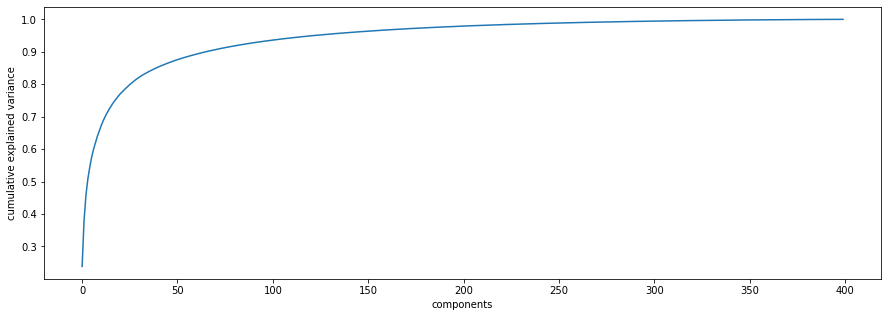

In [ ]:
pca = PCA(n_components=400, whiten=True)
pca.fit(df.data)
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('components')
plt.ylabel('cumulative explained variance')

As observed above the optimal component is 140, again initializing PCA with 140 components and we can see the perecent of variance of 140 componets to be 95.8%

In [ ]:
pca = PCA(n_components=140).fit(df.data)
components = pca.transform(df.data)
reduce_result = pca.inverse_transform(components)
percent = pca.explained_variance_ratio_
print("Percent of 140 optimal componenents =%s " % ((np.round(sum(percent), decimals=3) * 100)))

Percent of 140 optimal componenents =95.89999999999999 


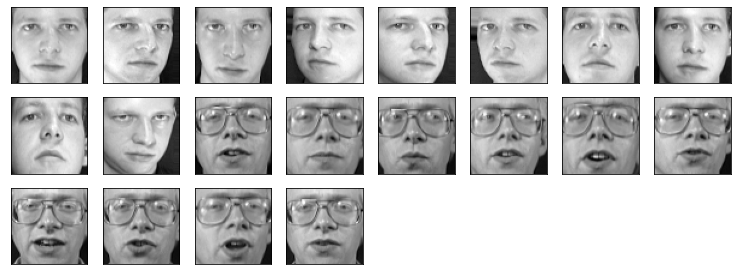

In [ ]:
# diaplay the first 20 pictures of original image set
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.20) 
for i in range(20):
  ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(df.data[i].reshape(64, 64), cmap='binary_r')
plt.show()

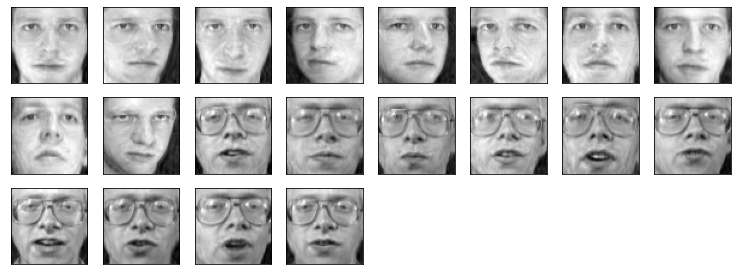

In [ ]:
# Output 20 pictures of already reduced image set
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.20) 
for i in range(20):
  ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(reduce_result[i].reshape(64, 64), cmap='binary_r')
plt.show()

**SVD Mehtod (PictureDataSet)**

In [ ]:
#loading the dace dataset to df and
# Applying SVD method and singular values, left singular and right singular
df = fetch_olivetti_faces()
scaled_data = StandardScaler().fit_transform(df.data)
U, S, V = np.linalg.svd(scaled_data, full_matrices=False)
print(U.shape, S.shape, V.shape)

(400, 400) (400,) (400, 4096)


- > Calculate and diaplayed the percent of variance when number of components being reduced.
- > It is Observed that nearly 130 would be above 90%

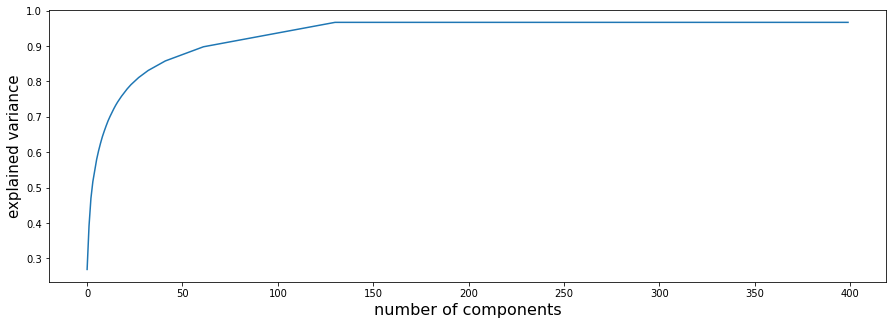

In [ ]:
svd_variance_ratio = np.round(S**2/np.sum(S**2), decimals=3)
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(svd_variance_ratio))
plt.xlabel('number of components', fontsize=16)
plt.ylabel('explained variance', fontsize=15);

In [ ]:
# Output values of each SVD Number Of Components
faces_target = df.target
labels = ['SVD '+str(i) for i in range(130,141)]
svd_df = pd.DataFrame(U[:,130:141], index=faces_target.tolist(), columns=labels)
svd_df = svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df

,Class,SVD 130,SVD 131,SVD 132,SVD 133,SVD 134,SVD 135,SVD 136,SVD 137,SVD 138,SVD 139,SVD 140
0,0,-0.035507,0.049224,-0.060795,-0.110603,0.057108,0.002626,-0.014485,0.001544,0.065199,-0.024810,-0.032900
1,0,-0.047744,0.015763,-0.064936,0.080007,0.062691,0.013925,0.021127,-0.014382,-0.111332,0.042482,0.008723
2,0,-0.088439,0.051196,-0.019343,0.057679,-0.073349,-0.013243,-0.011813,0.074457,-0.054017,-0.031417,-0.080975
3,0,0.073023,-0.015081,0.093651,-0.054134,-0.069855,0.006536,0.052573,-0.003985,0.002003,0.028447,-0.070748
4,0,-0.033107,0.025616,-0.047952,-0.011035,-0.006891,0.052295,-0.028892,0.048416,0.004739,0.050427,0.033431
...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,-0.015030,0.022278,-0.047001,-0.012749,0.022305,-0.067238,-0.013022,0.034838,0.075166,0.031456,0.013050
396,39,0.026313,-0.007205,0.007144,0.018888,-0.014661,0.040059,0.045668,0.035882,-0.018782,0.008923,-0.021765
397,39,-0.005175,-0.023854,0.063709,0.033785,0.023588,-0.062478,0.029687,0.035906,0.027840,-0.014766,-0.023831
398,39,-0.065860,-0.015132,0.030255,0.019642,-0.014923,0.090083,0.007546,0.028289,0.037890,-0.013239,-0.038476


**LLE(Picture DataSet)**

In [ ]:
df = fetch_olivetti_faces()
faces_data, faces_target = df.data, df.target
print(faces_data.shape, faces_target.shape)

(400, 4096) (400,)


Text(0, 0.5, 'dimension 2')

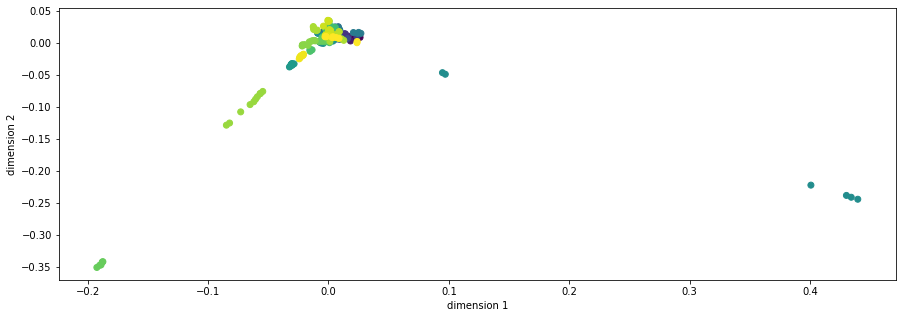

In [ ]:
# Applied Locally Linear Embedding with only two number of coordinates and fifteen number of testing neighbor
lle = LocallyLinearEmbedding(n_neighbors=15, n_components=2, method='modified')
out = lle.fit_transform(df['data'])
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(out[:, 0], out[:, 1], c=df['target'])
ax.set_xlabel('dimension 1')
ax.set_ylabel('dimension 2')

**t-SNE(PictureDataset)**

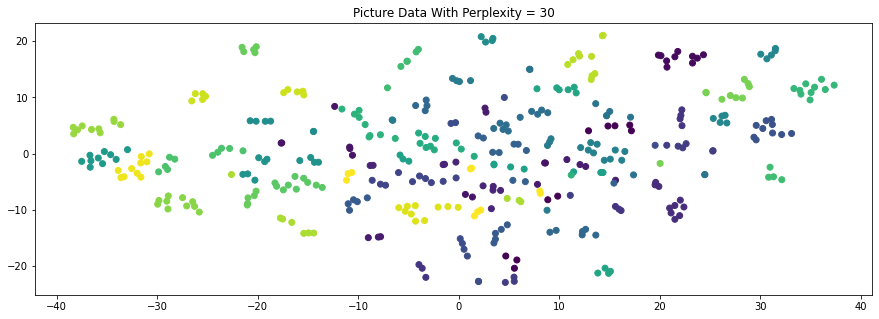

In [ ]:
# appplying TSNE with perplexity = 30
df = fetch_olivetti_faces()
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_results = tsne.fit_transform(df['data'])
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize=(15,5))
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=df.target)
plt.title('Picture Data With Perplexity = 30')
plt.show()

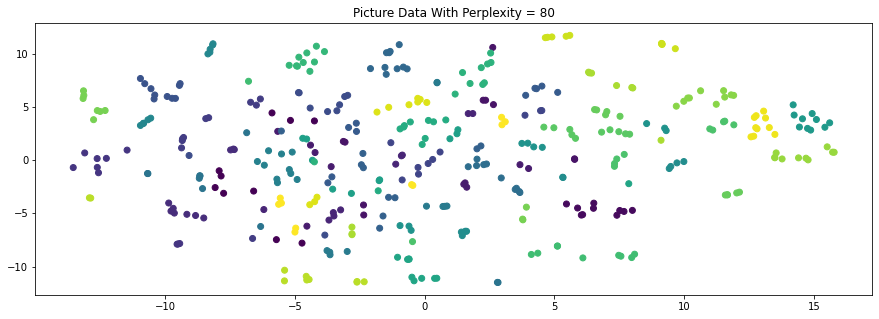

In [ ]:
# Applying TSNE with perplexity = 80
tsne = TSNE(n_components=2, perplexity=80, random_state=0)
tsne_results = tsne.fit_transform(df['data'])
tsne_results = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize=(15,5))
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=df.target)
plt.title('Picture Data With Perplexity = 80')
plt.show()

**ISOMAP(PictureDataset)**

In [ ]:
# Install missing package that is not Google Colab via pip
import umap
import scprep
!pip install scprep tasklogger
!pip install umap-learn

     |████████████████████████████████| 104 kB 14.8 MB/s 
     |████████████████████████████████| 86 kB 4.1 MB/s 
     |████████████████████████████████| 1.1 MB 38.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=e88f33ebdf65d7625f4676768a21412e7d704f5a33e101b5ccdbb580a15491c1
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=dfd3b2f90333f130750174a775cfdc7176330a1cdb4afe975a58f24d8b5236d8
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


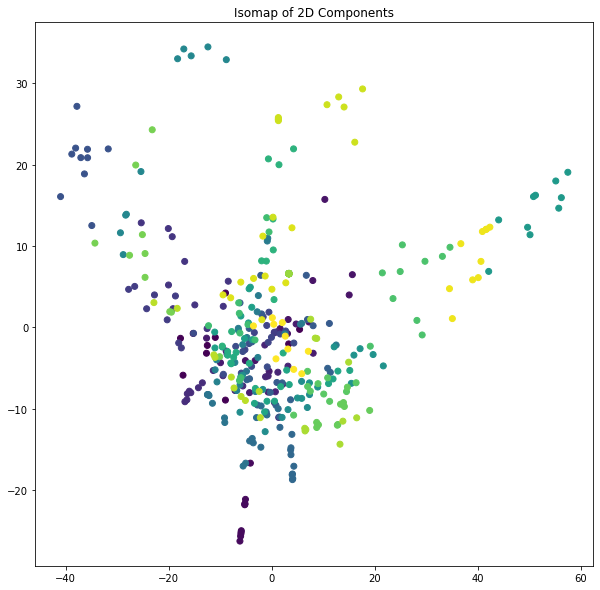

In [ ]:
#Applying ISOMAP with components = 2
df = fetch_olivetti_faces()
isomap = Isomap(n_components=2)
isomap_result = isomap.fit_transform(df['data'])
isomap_result = pd.DataFrame(isomap_result, columns=['isomap1', 'isomap2'])
isomap_result.head()
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('Isomap of 2D Components')
ax.scatter(isomap_result['isomap1'], isomap_result['isomap2'], c=df['target'])
plt.show()

**UMAP(Image Dataset)**

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


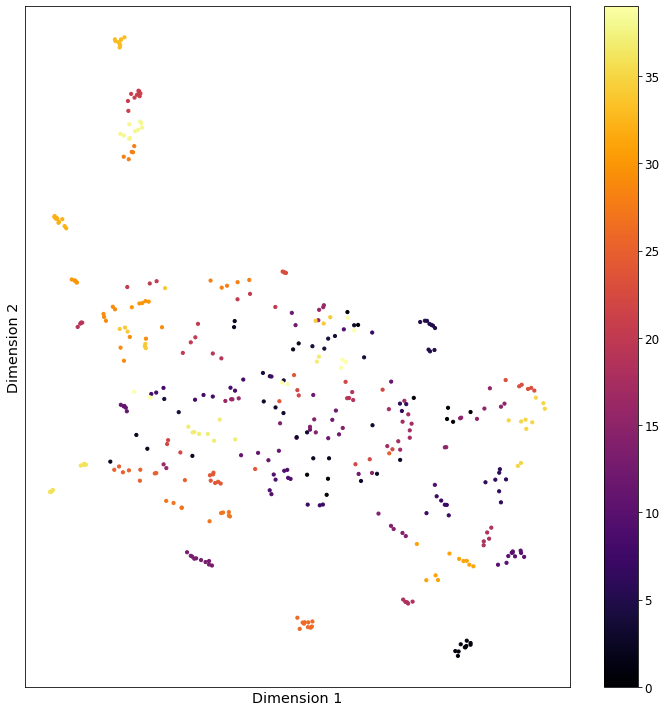

In [ ]:
df = fetch_olivetti_faces()
umap_op = umap.UMAP()
umap_result = umap_op.fit_transform(df['data'])
#default n components = 2
umap_result = pd.DataFrame(umap_result, columns=['umap1', 'umap2'])
scprep.plot.scatter2d(umap_result, c=df['target'], figsize=(10, 10), ticks=False, label_prefix='Dimension ')

**TABLULAR DATASET**

In [ ]:
from sklearn.datasets import load_wine


**PCA (TabularDataset)**

In [ ]:
#loading the wine data
wine = load_wine()
df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


df is loaded with has winedataset.
Below are the steps performed:
- > Initialize PCA with all the 13 features components.
- > display the percent of variance when number of components being reduced.
- > it is observed that nearly 140 features have above 90%

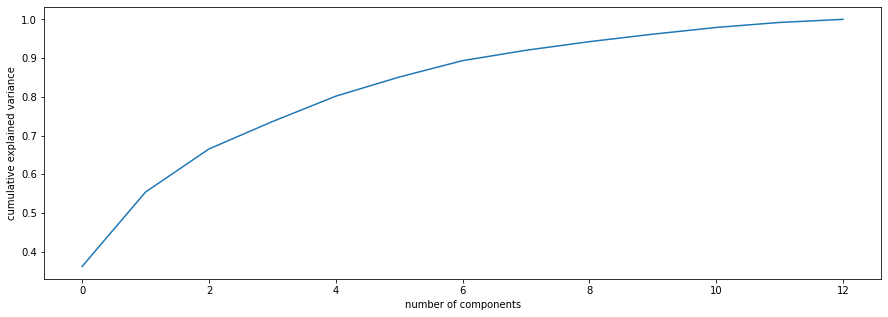

In [ ]:
scaled_data = StandardScaler().fit(df).transform(df)
pca = PCA(n_components = 13).fit(scaled_data)
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
# Since 10 is the most optimal component, intialized PCA again with 10 instead and output percent variance of 10 components for wine data => 96 %
pca = PCA(n_components = 10).fit(scaled_data)
x_pca = pca.transform(scaled_data)
percent = pca.explained_variance_ratio_
print("Retain percent of variance when number of components is 10 = %s " % ((np.round(sum(percent), decimals=5) * 100)))

Retain percent of variance when number of components is 10 = 96.17 


**SVD (TabularDataSet)**

In [ ]:
#loading the dataset to df and
# Applying SVD method and singular values, left singular and right singular
df = load_wine()
data, target = df.data, df.target
print(data.shape,target.shape)

(178, 13) (178,)


In [ ]:
#applying StandardSvaler
scaler = StandardScaler()
X_features = scaler.fit_transform(wine_data)
U, S, V = np.linalg.svd(X_features, full_matrices=False)
print(U.shape, S.shape, V.shape)

(178, 13) (13,) (13, 13)


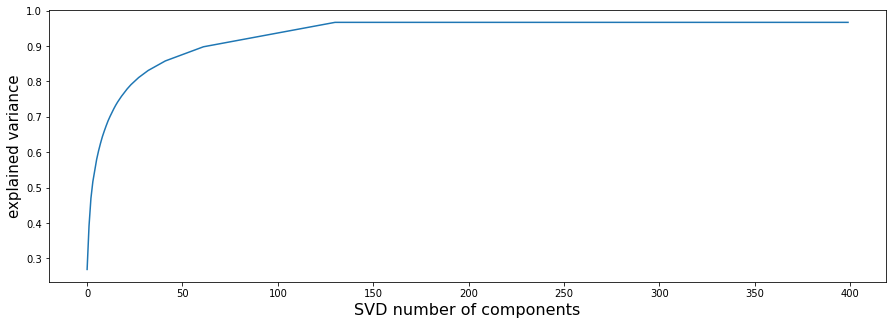

In [23]:
svd_variance_ratio = np.round(S**2/np.sum(S**2), decimals=3)
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(svd_variance_ratio))
plt.xlabel('SVD number of components', fontsize=16)
plt.ylabel('explained variance', fontsize=15);

In [ ]:
# Output the output values of each SVD Number Of Components
labels = ['SVD '+str(i) for i in range(1,13)]
svd_df = pd.DataFrame(U[:,1:13], index=wine_target.tolist(), columns=labels)
svd_df = svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV 1,SV 2,SV 3,SV 4,SV 5,SV 6,SV 7,SV 8,SV 9,SV 10,SV 11,SV 12
0,0,0.068468,-0.010330,0.016860,0.056236,0.020949,0.060223,-0.008271,-0.089452,0.152772,0.071229,0.098670,-0.015441
1,0,-0.015814,-0.126308,0.022781,-0.020907,0.086751,0.005430,-0.130067,0.043070,0.023897,0.022503,0.070834,0.000848
2,0,0.048911,0.061259,-0.056678,-0.020370,-0.051396,0.042833,0.043704,0.164254,0.016963,0.045219,0.000106,0.005063
3,0,0.130744,-0.010982,-0.044409,-0.025304,-0.010707,-0.038707,-0.081715,-0.007328,0.035825,-0.119816,-0.044156,-0.086133
4,0,0.041259,0.126323,0.032039,0.024218,0.038038,0.044839,-0.052907,-0.045576,-0.011726,0.082962,-0.039530,-0.018501


In [ ]:
# Output percent variance of 9 components is 96 %
all_percent = list(np.round(np.cumsum(svd_variance_ratio), decimals=5))
percent = all_percent.pop(9)
print("Retain percent of 9 number of componenents = %s " % (percent * 100))

Retain percent of 9 number of componenents = 96.1 


**Locally Linear Embedding(Tabular DataSet)**

In [ ]:
wine = load_wine()
wine_data, wine_target = wine.data, wine.target
print(wine_data.shape, wine_target.shape)

(178, 13) (178,)


Text(0, 0.5, 'dimension 2')

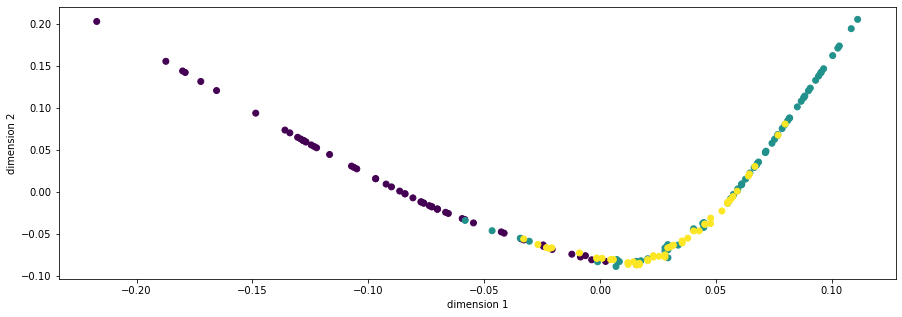

In [ ]:
# Applied Locally Linear Embedding with only two number of coordinates and 15 number of testing neighbor
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='modified')
out = lle.fit_transform(wine['data'])
fig, ax = plt.subplots(figsize=(15,5))
plt.scatter(out[:, 0], out[:, 1], c=wine['target'])
ax.set_xlabel('dimension 1')
ax.set_ylabel('dimension 2')

**TSNE for TabularDataset**

In [ ]:
# Loading wine data and scaling the data using StandardScalar
wine = load_wine()
wine_data, wine_target = wine.data, wine.target
df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
df = StandardScaler().fit_transform(df)

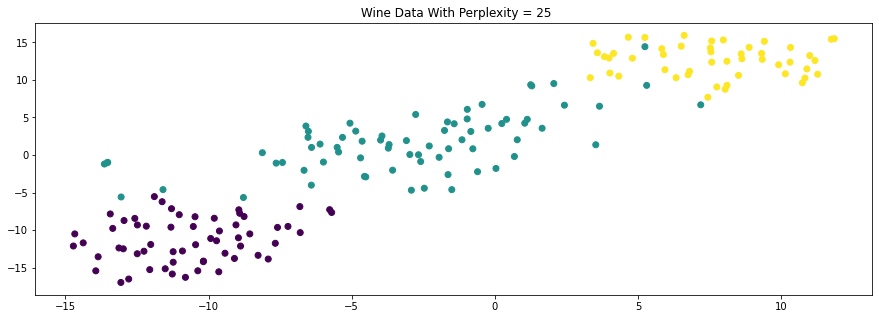

In [ ]:
# Applied TSNE with perplexity = 25
tsne = TSNE(n_components=2, perplexity=25, random_state=0)
tsne_results = tsne.fit_transform(df)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize=(15,5))
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=wine.target)
plt.title(' Wine Data With Perplexity = 25')
plt.show()

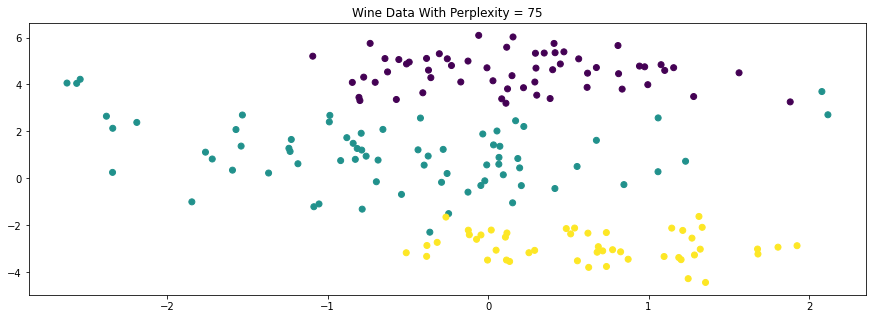

In [ ]:
# Applied TSNE with perplexity = 75
tsne = TSNE(n_components=2, perplexity=75, random_state=0)
tsne_results = tsne.fit_transform(df)
tsne_results = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize=(15,5))
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=wine.target)
plt.title('Wine Data With Perplexity = 75')
plt.show()

**ISOMAP for  TabulardataSet**

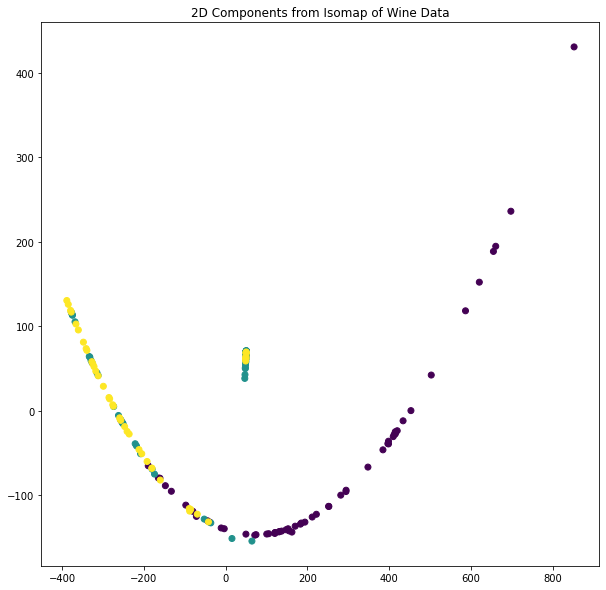

In [ ]:
# Applying ISOMAP with n components = 2
wine = load_wine()
wine_data, wine_target = wine.data, wine.target
isomap = Isomap(n_components=2)
isomap_result = isomap.fit_transform(wine_data)
isomap_result = pd.DataFrame(isomap_result, columns=['isomap1', 'isomap2'])
fig = plt.figure(figsize=(15,5))
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Wine Data')
ax.scatter(isomap_result['isomap1'], isomap_result['isomap2'], c=wine_target)
plt.show()

**UMAP(TabularDataSet)**

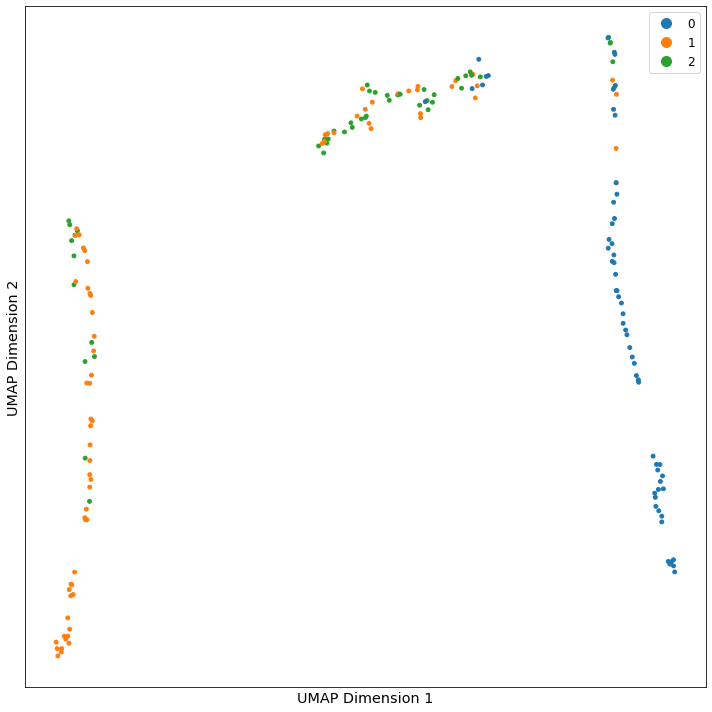

In [ ]:
wine = load_wine()
wine_data, wine_target = wine.data, wine.target
umap_op = umap.UMAP()
umap_result = umap_op.fit_transform(wine_data)
#default n components = 2
umap_result = pd.DataFrame(umap_result, columns=['umap1', 'umap2'])
scprep.plot.scatter2d(umap_result, c=wine['target'], figsize=(10, 10), ticks=False, label_prefix='UMAP Dimension ')